### Exploring Data 


In [1]:
#importing required libraries
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd


#### Loading the Data

In [2]:
mig_df = pd.read_csv('MissingMigrants.csv', encoding='latin-1')
mig_df.head()

,Web ID,Region of Incident,Reported Date,Reported Year,Reported Month,Number Dead,Minimum Estimated Number of Missing,Total Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Cause of Death,Location Description,Information Source,Location Coordinates,Migration Route,URL,UNSD Geographical Grouping,Source Quality
0,52491,Mediterranean,14-Oct-19,2019,Oct,2.0,NaN,2,33.0,NaN,NaN,2.0,Drowning,"Off the coast of Alt?nova, Ayval?k, Bal?kesir ...","IOM Turkey, Turkish Coast Guard","39.207629332807, 26.683134343416",Eastern Mediterranean,"http://bit.ly/2IM85We, http://bit.ly/2IMOxAY, ...",Uncategorized,5
1,52496,Europe,14-Oct-19,2019,Oct,2.0,NaN,2,NaN,NaN,2.0,1.0,Drowning,"Bodies recovered on Le Touquet, Pas-de-Calais,...","Franceinfo, Le Monde","50.524419783820, 1.556037455696",NaN,"http://bit.ly/2pm5ZW8, http://bit.ly/32kxFt6",Western Europe,3
2,52495,US-Mexico Border,12-Oct-19,2019,Oct,1.0,NaN,1,NaN,NaN,1.0,NaN,Drowning,"Río Bravo, near La Playita, Reynosa, Tamaulipa...","El Mañana, Milenio","26.144549816768, -98.332108082516",NaN,"http://bit.ly/35tCuCp, http://bit.ly/2piU7V7",Central America,3
3,52494,Central America,11-Oct-19,2019,Oct,3.0,NaN,3,8.0,NaN,3.0,NaN,Drowning,"Off the coast of Tonalá, between Puerto Arista...","Instituto Nacional de Migración, El Universal,...","15.880321192613, -93.833002001726",NaN,"http://bit.ly/2pmU6PG, http://bit.ly/2MeL8gy, ...",Central America,5
4,52489,Europe,9-Oct-19,2019,Oct,3.0,NaN,3,12.0,NaN,1.0,NaN,Vehicle Accident,"Road near Areti, 40km northeast of Thessalonik...","IOM Greece, Ekathimerini","40.740769378941, 23.256371964803",NaN,http://bit.ly/2VsDDpg,Southern Europe,4


#### Exploring Dataset

In [3]:
# check the data frame info
#print(mig_df.info())
mig_df['Cause of Death'].unique()

array(['Drowning', 'Vehicle Accident', 'Hit by truck', 'Hit by train',
       'Dehydration', 'Unknown', 'Plane stowaway',
       'Unknown (skeletal remains)', 'Hyperthermia', 'Shot',
       'Sickness and lack of access to medicines', 'Presumed drowing',
       'Unknown (mummified remains)', 'Head injury', 'Violence',
       'Sickness', 'Sickness and lack of access to medicine',
       'Killed by landmine blast', 'Fall from train', 'Cardiac arrest',
       'Probable hyperthermia', 'Presumed drowning', 'Suicide',
       'Suffocation', nan, 'Fell from truck',
       'Dehydration, Starvation, Drowning', 'Multiple organ failure',
       'Hypothermia', 'Stabbed', 'Presumed vehicle accident',
       'Probable hypothermia', 'Tortured, Murdered',
       'Presumed drowning, Hypothermia',
       'Injuries after falling from border wall', 'Heart attack',
       'Dehydration, Exposure', 'Hit by vehicle',
       'Fall from train, Violence', 'Malnutrition', 'Hanging',
       'Drowning, Dehydration',


In [4]:
len(mig_df['Cause of Death'].unique().tolist())
#261 unique cause of death reported

261

In [5]:
#Cleaning up the data to further investgate real causes of death

mig_df['Cause of Death'] = mig_df['Cause of Death'].str.replace(r'(^.*drowning.*$)','Drowning', case = False)
mig_df['Cause of Death'] = mig_df['Cause of Death'].str.replace(r'(^.*asphyxiation.*$)', 'Asphyxiation',case = False)
mig_df['Cause of Death'] = mig_df['Cause of Death'].str.replace(r'(^.*assault.*$)', 'Assault', case = False)
mig_df['Cause of Death'] = mig_df['Cause of Death'].str.replace(r'(^.*dehydration.*$)', 'Dehydration',case = False)
mig_df['Cause of Death'] = mig_df['Cause of Death'].str.replace(r'(^.*hyperthermia.*$)', 'Hyperthermia',case = False)
mig_df['Cause of Death'] = mig_df['Cause of Death'].str.replace(r'(^.*burn.*$)','Burned', case = False)
mig_df['Cause of Death'] = mig_df['Cause of Death'].str.replace(r'(^.*beat.*$)', 'Beaten To Death',case = False)
mig_df['Cause of Death'] = mig_df['Cause of Death'].str.replace(r'(^.*injur.*$)', 'Fatal Injuries', case = False)
mig_df['Cause of Death'] = mig_df['Cause of Death'].str.replace(r'(^.*violen.*$)', 'Violence',case = False)
mig_df['Cause of Death'] = mig_df['Cause of Death'].str.replace(r'(^.*exposure.*$)', 'Exposure',case = False)

mig_df['Cause of Death'] = mig_df['Cause of Death'].str.replace(r'(^.*vehicle.*$)','Vehicle Accident', case = False)
mig_df['Cause of Death'] = mig_df['Cause of Death'].str.replace(r'(^.*train.*$)', 'Vehicle Accident',case = False)
mig_df['Cause of Death'] = mig_df['Cause of Death'].str.replace(r'(^.*Accident.*$)', 'Vehicle Accident', case = False)
mig_df['Cause of Death'] = mig_df['Cause of Death'].str.replace(r'(^.*suffocation.*$)', 'Suffocation',case = False)
mig_df['Cause of Death'] = mig_df['Cause of Death'].str.replace(r'(^.*electro.*$)', 'Electrocution',case = False)
mig_df['Cause of Death'] = mig_df['Cause of Death'].str.replace(r'(^.*mixed.*$)','Multiple Causes', case = False)
mig_df['Cause of Death'] = mig_df['Cause of Death'].str.replace(r'(^.*abuse.*$)', 'Physical and Sexual Abuse',case = False)
mig_df['Cause of Death'] = mig_df['Cause of Death'].str.replace(r'(^.*rape.*$)', 'Physical and Sexual Abuse', case = False)
mig_df['Cause of Death'] = mig_df['Cause of Death'].str.replace(r'(^.*murder.*$)', 'Murder',case = False)
mig_df['Cause of Death'] = mig_df['Cause of Death'].str.replace(r'(^.*sick.*$)', 'Extended Sickness',case = False)

mig_df['Cause of Death'] = mig_df['Cause of Death'].str.replace(r'(^.*hospital.*$)','Died in Hospital', case = False)
mig_df['Cause of Death'] = mig_df['Cause of Death'].str.replace(r'(^.*bron.*$)', 'Illness',case = False)
mig_df['Cause of Death'] = mig_df['Cause of Death'].str.replace(r'(^.*flue.*$)', 'Illness', case = False)
mig_df['Cause of Death'] = mig_df['Cause of Death'].str.replace(r'(^.*Shot.*$)', 'Violence',case = False)
mig_df['Cause of Death'] = mig_df['Cause of Death'].str.replace(r'(^.*Pulmonary.*$)', 'Illness',case = False)
mig_df['Cause of Death'] = mig_df['Cause of Death'].str.replace(r'(^.*Kidney.*$)','Illness', case = False)
mig_df['Cause of Death'] = mig_df['Cause of Death'].str.replace(r'(^.*renal.*$)', 'Illness',case = False)
mig_df['Cause of Death'] = mig_df['Cause of Death'].str.replace(r'(^.*unknown.*$)', 'Unknown', case = False)
mig_df['Cause of Death'] = mig_df['Cause of Death'].str.replace(r'(^.*various.*$)', 'Multiple Causes',case = False)

mig_df['Cause of Death'] = mig_df['Cause of Death'].str.replace(r'(^.*blunt.*$)','Fatal Injuries', case = False)
mig_df['Cause of Death'] = mig_df['Cause of Death'].str.replace(r'(^.*fire.*$)', 'Burned',case = False)
mig_df['Cause of Death'] = mig_df['Cause of Death'].str.replace(r'(^.*crush.*$)', 'Fatal Injuries', case = False)
mig_df['Cause of Death'] = mig_df['Cause of Death'].str.replace(r'(^.*bleeding.*$)', 'Fatal Injuries',case = False)
mig_df['Cause of Death'] = mig_df['Cause of Death'].str.replace(r'(^.*fall.*$)', 'Fatal Injuries',case = False)
mig_df['Cause of Death'] = mig_df['Cause of Death'].str.replace(r'(^.*fell.*$)','Fatal Injuries', case = False)
mig_df['Cause of Death'] = mig_df['Cause of Death'].str.replace(r'(^.*weather.*$)', 'Harsh Weather Conditions',case = False)
mig_df['Cause of Death'] = mig_df['Cause of Death'].str.replace(r'(^.*truck.*$)', 'Vehicle Accident', case = False)
mig_df['Cause of Death'] = mig_df['Cause of Death'].str.replace(r'(^.*car.*$)', 'Vehicle Accident',case = False)

mig_df['Cause of Death'] = mig_df['Cause of Death'].str.replace(r'(^.*plane.*$)','Vehicle Accident', case = False)
mig_df['Cause of Death'] = mig_df['Cause of Death'].str.replace(r'(^.*harsh.*$)', 'Harsh Weather Conditions',case = False)
mig_df['Cause of Death'] = mig_df['Cause of Death'].str.replace(r'(^.*heat.*$)', 'Harsh Weather Conditions',case = False)
mig_df['Cause of Death'] = mig_df['Cause of Death'].str.replace(r'(^.*seizure.*$)', 'Exposure',case = False)
mig_df['Cause of Death'] = mig_df['Cause of Death'].str.replace(r'(^.*fuel.*$)', 'Vehicle Accident', case = False)
mig_df['Cause of Death'] = mig_df['Cause of Death'].str.replace(r'(^.*head.*$)', 'Fatal Injuries',case = False)
mig_df['Cause of Death'] = mig_df['Cause of Death'].str.replace(r'(^.*heart.*$)', 'Heart Attack',case = False)
mig_df['Cause of Death'] = mig_df['Cause of Death'].str.replace(r'(^.*Hypothermia.*$)','Hypothermia', case = False)
mig_df['Cause of Death'] = mig_df['Cause of Death'].str.replace(r'(^.*Unknow.*$)', 'Unknown',case = False)
mig_df['Cause of Death'] = mig_df['Cause of Death'].str.replace(r'(^.*Respir.*$)', 'Illness', case = False)
mig_df['Cause of Death'] = mig_df['Cause of Death'].str.replace(r'(^.*Meningitis.*$)', 'Illness',case = False)

mig_df['Cause of Death'] = mig_df['Cause of Death'].str.replace(r'(^.*cancer.*$)','Illness', case = False)
mig_df['Cause of Death'] = mig_df['Cause of Death'].str.replace(r'(^.*crisis.*$)', 'Illness',case = False)
mig_df['Cause of Death'] = mig_df['Cause of Death'].str.replace(r'(^.*fumes.*$)', 'Vehicle Accident', case = False)
mig_df['Cause of Death'] = mig_df['Cause of Death'].str.replace(r'(^.*mine.*$)', 'Fatal Injuries',case = False)

mig_df['Cause of Death'] = mig_df['Cause of Death'].str.replace(r'(^.*Death due to Fall.*$)','Fatal Injuries', case = False)
mig_df['Cause of Death'] = mig_df['Cause of Death'].str.replace(r'(^.*Unspeci.*$)','Unknown', case = False)
mig_df['Cause of Death'] = mig_df['Cause of Death'].str.replace(r'(^.*county.*$)','Unknown', case = False)
mig_df['Cause of Death'] = mig_df['Cause of Death'].str.replace(r'(^.*near.*$)','Unknown', case = False)
mig_df['Cause of Death'] = mig_df['Cause of Death'].str.replace(r'(^.*pneumonia.*$)','Illness', case = False)
mig_df['Cause of Death'] = mig_df['Cause of Death'].str.replace(r'(^.*artery.*$)', 'Illness',case = False)
mig_df['Cause of Death'] = mig_df['Cause of Death'].str.replace(r'(^.*pneumonia.*$)','Illness', case = False)
mig_df['Cause of Death'] = mig_df['Cause of Death'].str.replace(r'(^.*artery.*$)', 'Illness',case = False)
mig_df['Cause of Death'] = mig_df['Cause of Death'].str.replace(r'(^.*glycemia.*$)','Illness', case = False)
mig_df['Cause of Death'] = mig_df['Cause of Death'].str.replace(r'(^.*lung.*$)', 'Illness',case = False)
mig_df['Cause of Death'] = mig_df['Cause of Death'].str.replace(r'(^.*organ.*$)','Illness', case = False)
mig_df['Cause of Death'] = mig_df['Cause of Death'].str.replace(r'(^.*rockslide.*$)', 'Fatal Injuries',case = False)
mig_df['Cause of Death'] = mig_df['Cause of Death'].str.replace(r'(^.*shell.*$)', 'Fatal Injuries',case = False)
mig_df['Cause of Death'] = mig_df['Cause of Death'].str.replace(r'(^.*malnutrition.*$)', 'Illness',case = False)
mig_df['Cause of Death'] = mig_df['Cause of Death'].str.replace(r'(^.*hippopotamus.*$)','Animal Attack', case = False)
mig_df['Cause of Death'] = mig_df['Cause of Death'].str.replace(r'(^.*crocodile.*$)', 'Animal Attack',case = False)
mig_df['Cause of Death'] = mig_df['Cause of Death'].str.replace(r'(^.*hippoptamus.*$)', 'Animal Attack',case = False)





In [9]:
len(mig_df['Cause of Death'].unique().tolist())

#33 unique cause of death reported


32

In [7]:
mig_df = mig_df.dropna(subset = ['Cause of Death'])

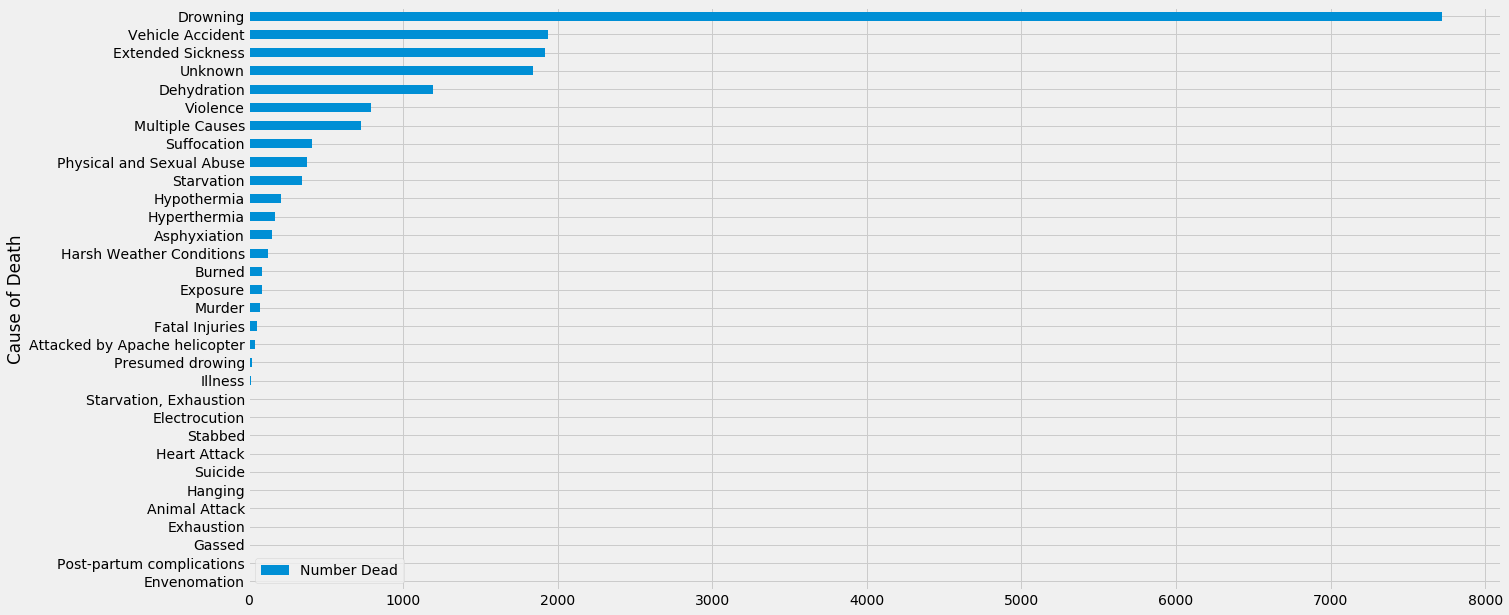

In [8]:
#Causes leading to most deaths
Deaths = mig_df.groupby('Cause of Death')['Number Dead'].sum().sort_values()

Deaths = Deaths.to_frame()

Deaths = Deaths[Deaths['Number Dead'] != 0]
#ploting
plt.style.use("fivethirtyeight")
Deaths.plot.barh(figsize=(20,10))


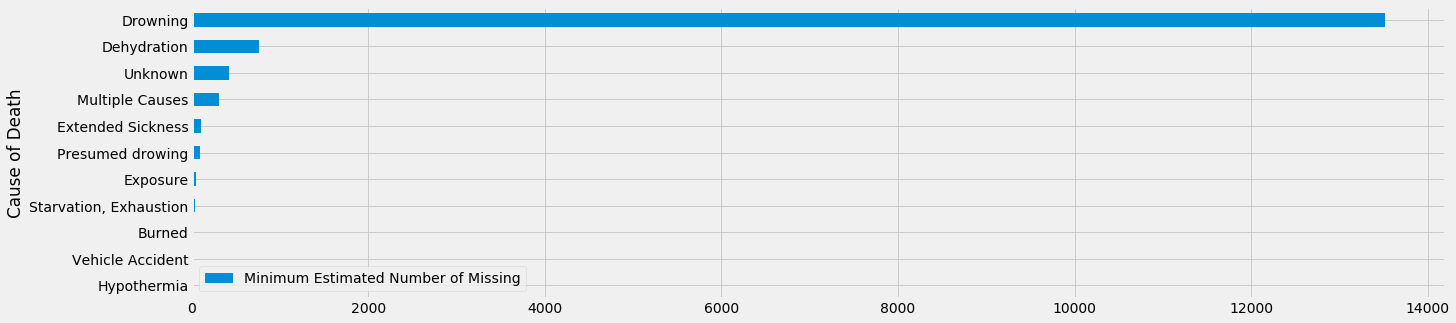

In [10]:
Missing = mig_df.groupby('Cause of Death')['Minimum Estimated Number of Missing'].sum().sort_values()


Missing = Missing.to_frame()

Missing = Missing[Missing['Minimum Estimated Number of Missing']!= 0]
#Missing
#ploting
#plt.style.use("fivethirtyeight")

Missing.plot.barh(figsize=(20,5))

#### Location Specific Causes of Deaths and Missing people


In [11]:
#Cleaning the Location Column 

mig_df['Region of Incident'] = mig_df['Region of Incident'].str.replace(r'(^.*Middle East.*$)','Middle East', case = False)
mig_df['Region of Incident'] = mig_df['Region of Incident'].str.replace(r'(^.*Horn.*$)','Africa', case = False)
mig_df['Region of Incident'] = mig_df['Region of Incident'].str.replace(r'(^.*Asia.*$)','Asia', case = False)
mig_df['Region of Incident'] = mig_df['Region of Incident'].str.replace(r'(^.*Mexico.*$)','Central America', case = False)
mig_df['Region of Incident'] = mig_df['Region of Incident'].str.replace(r'(^.*Africa.*$)','Africa', case = False)
mig_df['Region of Incident'] = mig_df['Region of Incident'].str.replace(r'(^.*Caribbean.*$)','Central America', case = False)


mig_df['Region of Incident'].unique().tolist()

['Mediterranean',
 'Europe',
 'Central America',
 'Africa',
 'Middle East',
 'Asia',
 'South America',
 'North America']

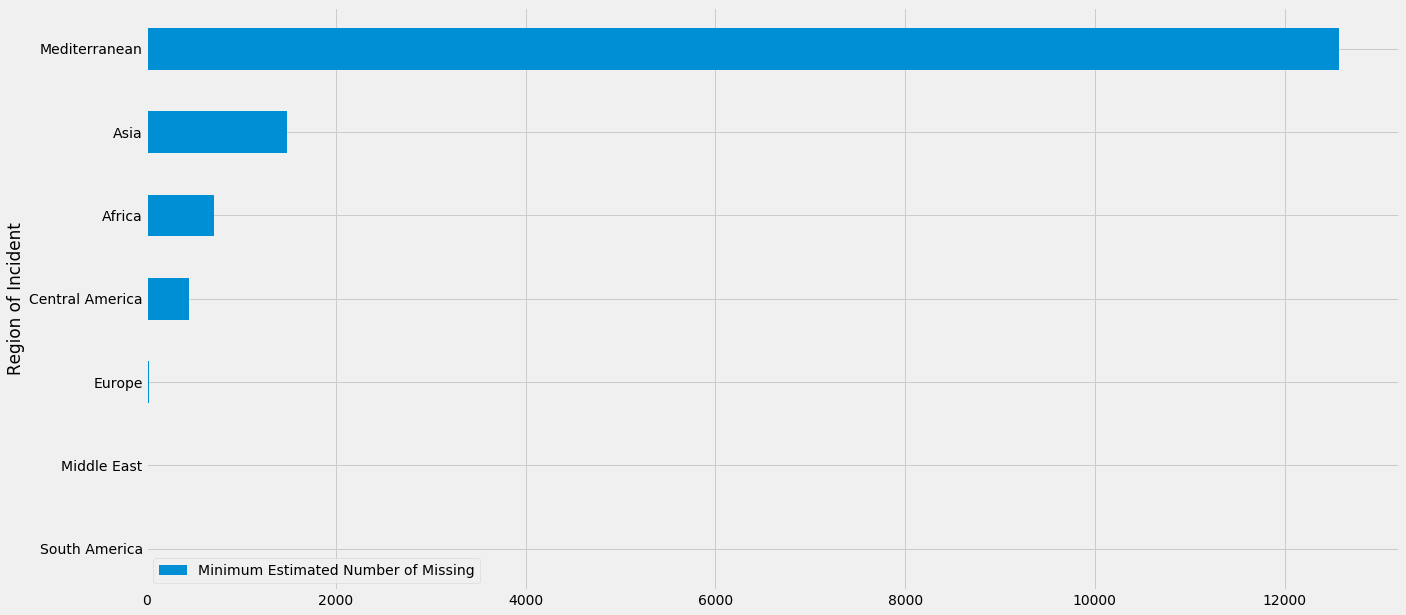

In [12]:

#Looking at deaths and missing people by region
Region_missing = mig_df.groupby('Region of Incident')['Minimum Estimated Number of Missing'].sum().sort_values()
Region_missing = Region_missing.to_frame()

Region_missing = Region_missing[Region_missing['Minimum Estimated Number of Missing'] != 0]

#ploting
plt.style.use("fivethirtyeight")

Region_missing.plot.barh(figsize=(20,10))

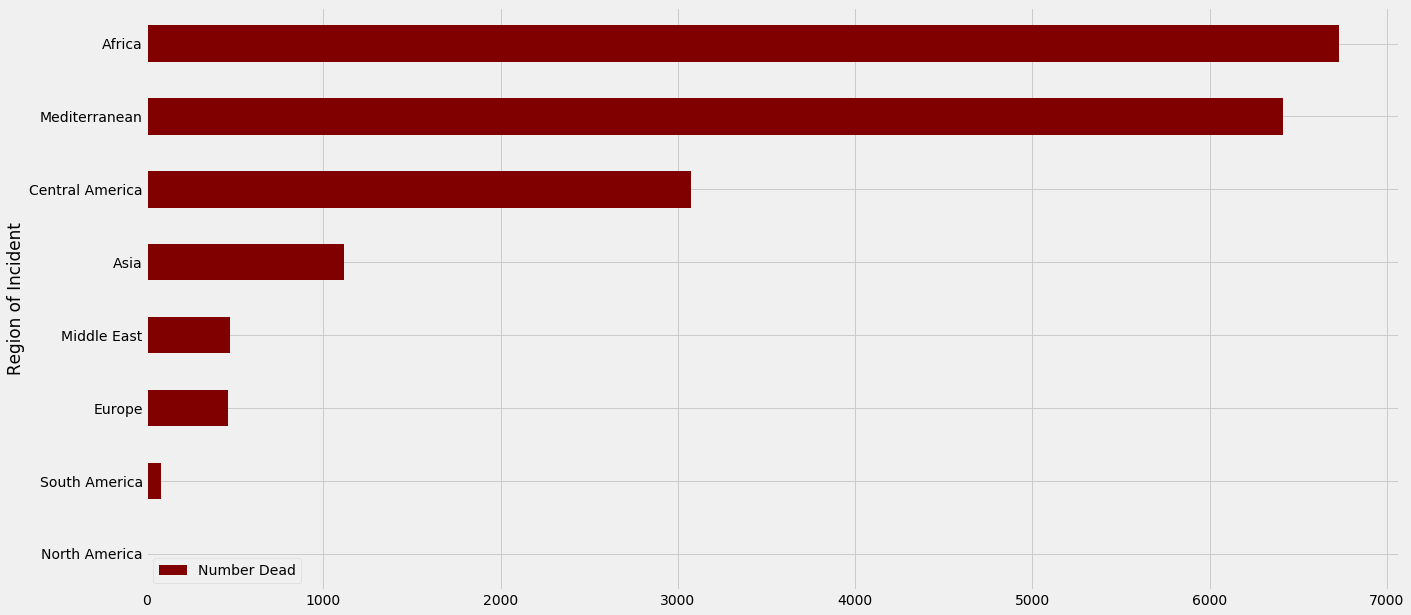

In [13]:

#Looking at deaths and missing people by region
Region_dead = mig_df.groupby('Region of Incident')['Number Dead'].sum().sort_values()
Region_dead= Region_dead.to_frame()

Region_dead = Region_dead[Region_dead['Number Dead'] != 0]

#ploting
plt.style.use("fivethirtyeight")

Region_dead.plot.barh(figsize=(20,10), color = 'maroon')

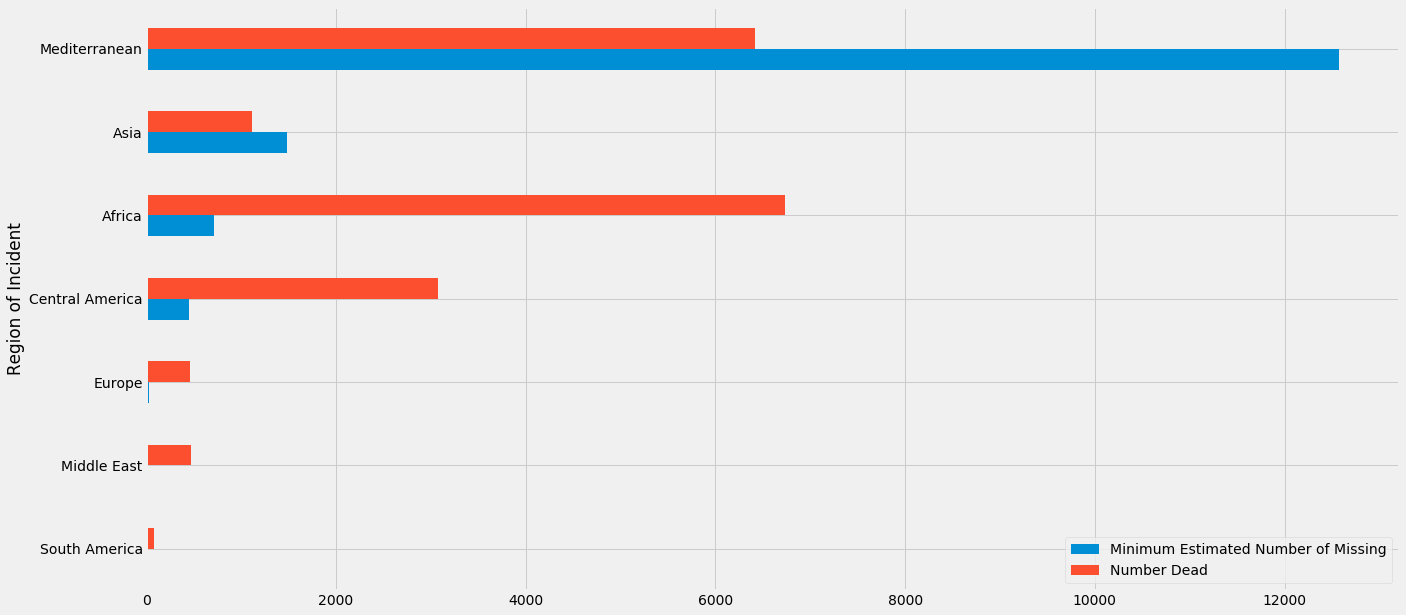

In [14]:
#Exploring deaths and missing together to look for patterns 

Region = mig_df.groupby('Region of Incident')['Minimum Estimated Number of Missing', 'Number Dead'].sum().sort_values('Minimum Estimated Number of Missing')

Region= Region[Region['Minimum Estimated Number of Missing'] != 0]

#ploting
plt.style.use("fivethirtyeight")
Region.plot.barh(figsize=(20,10))

In [15]:
#Looking at region specific causes of deaths

Region_causes = mig_df.groupby(['Region of Incident', 'Cause of Death'])['Number Dead'].count()
Region_causes= Region_causes.to_frame()

Region_causes = Region_causes[Region_causes['Number Dead'] > 10]
#type(Region_causes)

test = Region_causes['Number Dead'].groupby(level=0, group_keys=False)
Region_causes = test.nlargest(5).to_frame()

Region_causes
#ploting
#plt.style.use("fivethirtyeight")
#Region_causes.plot.barh(figsize=(20,10))

Number Dead
Region of Incident Cause of Death                        
Africa             Extended Sickness                  809
                   Dehydration                        342
                   Vehicle Accident                   331
                   Violence                           177
                   Physical and Sexual Abuse          132
Asia               Vehicle Accident                    98
                   Violence                            47
                   Drowning                            46
                   Dehydration                         24
                   Unknown                             15
Central America    Unknown                            856
                   Drowning                           441
                   Vehicle Accident                   264
                   Hyperthermia                       127
                   Dehydration                         61
Europe             Vehicle Accident                   132
                   Drowning                            51
                   Hypothermia                         17
                   Fatal Injuries                      15
                   Unknown                             14
Mediterranean      Drowning                           685
                   Unknown                            144
                   Hypothermia                         14
                   Asphyxiation                        11
Middle East        Violence                            72
                   Extended Sickness                   50
                   Vehicle Accident                    21
                   Drowning                            17
                   Hypothermia                         12

In [114]:
#exporting cleaned Dataframe for use in Tableau
mig_df.to_csv('NewMigrants.csv')